#  Plotting for Exploratory data analysis (EDA) 

# Haberman cancer survival dataset
 
 haberman dataset [https://drive.google.com/open?id=1o1I9PLyjqGgs0eOylK-2srXM2ZH3mIVb]
 
 
 *The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
 
 There are two classes are given name 1 and 2.These are Survival status 1 means patient will survive 5 years or longer
 2 means the patient died within 5 year.
 
 OBJECTIVE:-
 To find whether the patient will survive more than 5 years or die within five year based on age of patient,year of operation and number of positive axillary nodes
 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
haberman = pd.read_csv("G:/New folder/haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [15]:
haberman_1 = haberman.loc[ haberman['status'] == 1 ]
haberman_2 = haberman.loc[ haberman['status'] == 2 ]
print(haberman_1.head())
print("----------------------------")
print("----------------------------")
print(haberman_2.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
----------------------------
----------------------------
    age  year  nodes  status
7    34    59      0       2
8    34    66      9       2
24   38    69     21       2
34   39    66      0       2
43   41    60     23       2


In [11]:
#datapoints and features

print(haberman . shape)

(306, 4)


In [7]:
#column names and datatypes

print(haberman . columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [11]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

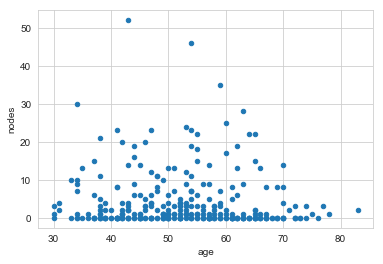

In [12]:
#2-d scatter plotting

haberman.plot(kind='scatter' , x = 'age', y = 'nodes');
plt.show()

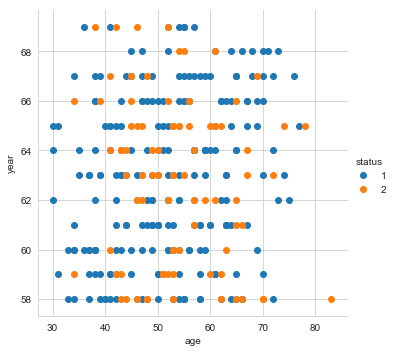

In [21]:
#2-d scatter plot with coloring classes

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=5) \
.map(plt.scatter, "age", "year") \
.add_legend();
plt.show()


# OBSERVATION

  1.Using year and age we can find out whether the patien will survive or not.
  
  2.Plotted data is absolute mess, hence we cannot separate the data.

C:\Users\waqqas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\waqqas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\waqqas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


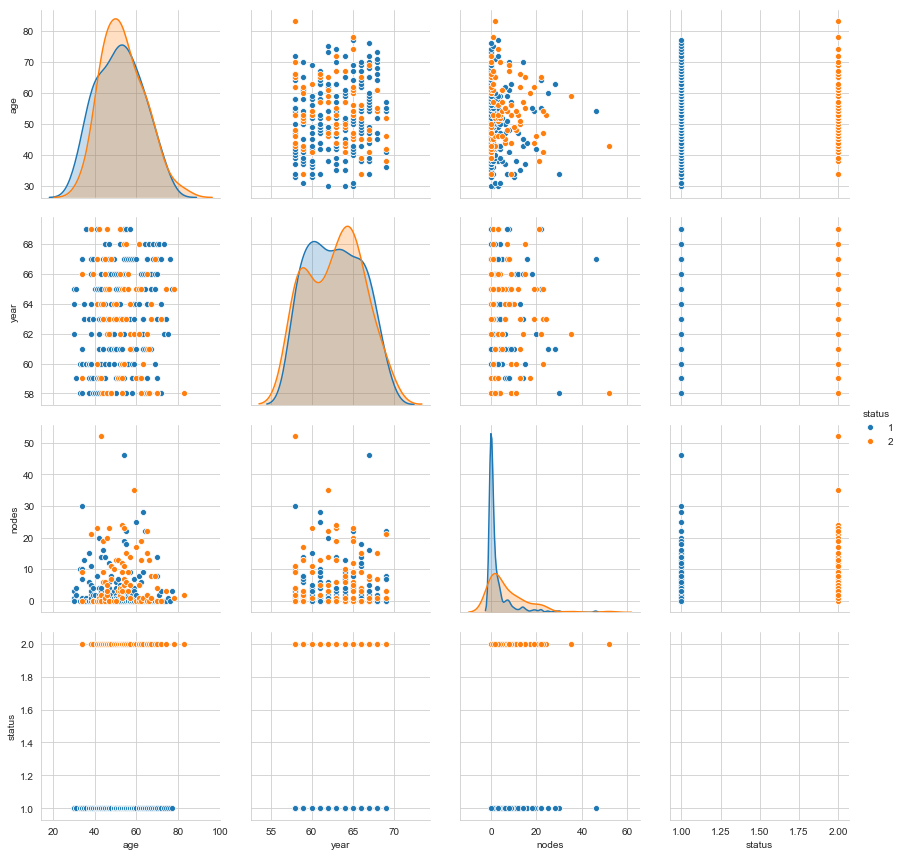

In [22]:
#pair-plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3);
plt.show()

# OBSERVATION
  
  we can nodes is better plotted as compared to age and year

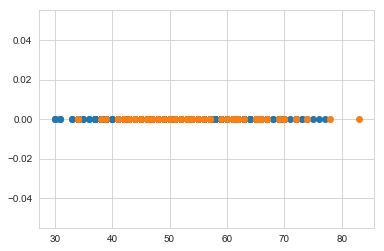

In [78]:
#1-d scatter plot (histogram)
import numpy as np

haberman_1 = haberman.loc[ haberman['status'] == 1 ]
haberman_2 = haberman.loc[ haberman['status'] == 2 ]
plt.plot(haberman_1["age"], np.zeros_like(haberman_1['age']), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2['age']), 'o')

plt.show()


# OBSERVATION

  plotted points are very badly overlapped so not possible to make any kind of decision.

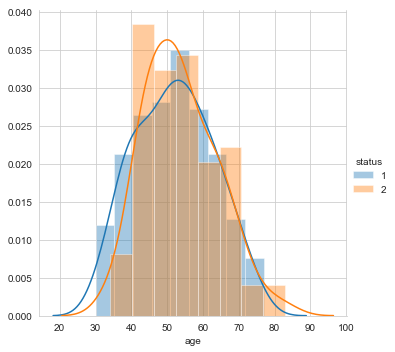

In [32]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();


# Observation

 data is overlapping

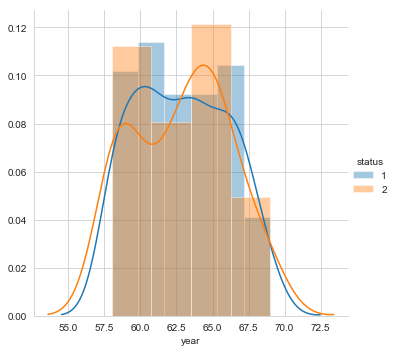

In [33]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

# Observation 
  
  data is overlapping

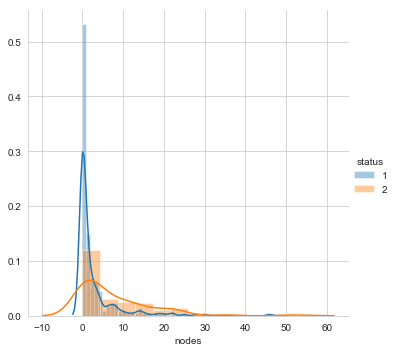

In [34]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

# OBSERVATION

  patient have less number of nodes have survived cancer for more than 5 years after operation.

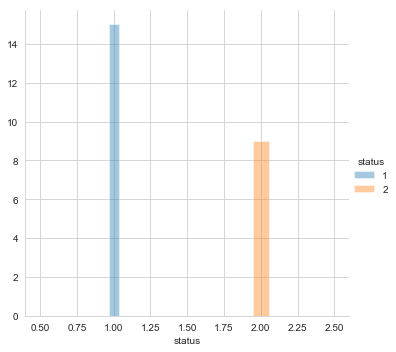

In [35]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "status") \
   .add_legend();
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


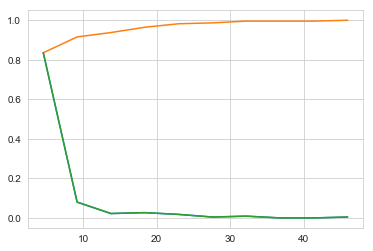

In [17]:
counts, bin_edges = np.histogram(haberman_1 ['nodes'], density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(haberman_1 ['nodes'], density = True)

pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


# Observation

CDF shows that 90% patients who survived cancer after operation have 10 nodes

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


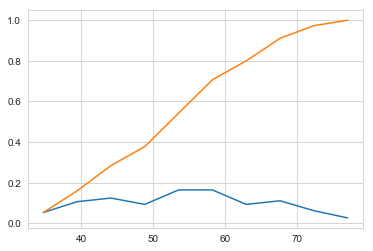

In [90]:
counts, bin_edges = np.histogram(haberman_1 ['age'], density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()


# Observation
  
  CDF shows that 95% patients who survived cancer after operation have age of 70.
  

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


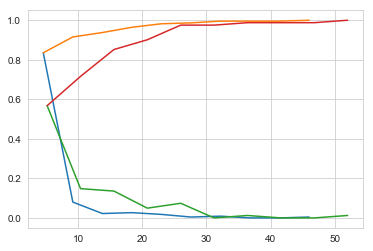

In [91]:
#status_1

counts, bin_edges = np.histogram(haberman_1 ['nodes'], density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


#status_2

counts, bin_edges = np.histogram(haberman_2 ['nodes'], density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()






In [92]:
#mean, variance, standard deviation

print("means:")
print(np.mean(haberman_1["age"]))
#mean with an outlier.
print(np.mean(np.append(haberman_1["age"],50)))
print(np.mean(haberman_2["age"]))

print("\nStd-dev:");
print(np.std(haberman_1["age"]))
print(np.std(haberman_2["age"]))



means:
52.01777777777778
52.008849557522126
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


In [93]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_1["age"]))
#Median with an outlier

print(np.median(np.append(haberman_1["age"],50)))
print(np.median(haberman_2["age"]))


print("\nQuantiles:")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_1["age"],90))
print(np.percentile(haberman_2["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["age"]))
print(robust.mad(haberman_2["age"]))


Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


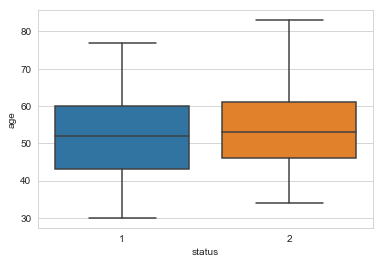

In [98]:
#Box plot age

sns.boxplot(x='status',y='age', data=haberman)
plt.show()

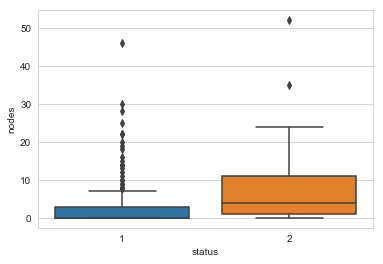

In [21]:
#Box plot nodes

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

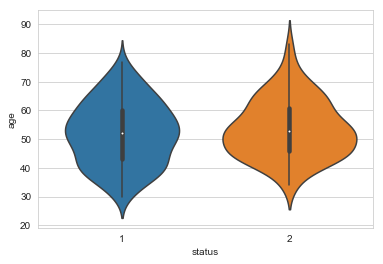

In [19]:
#violin plot age

sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()

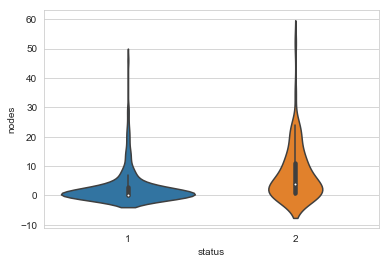

In [20]:
#violin plot node

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()